In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://archive.ics.uci.edu/ml/datasets/heart+disease

from warnings import filterwarnings
filterwarnings("ignore")
# filterwarnings(action='ignore',category=FutureWarning)
# from sklearn.exceptions import DataConversionWarning
# filterwarnings(action='ignore',category=DataConversionWarning)

In [2]:
data=pd.read_csv('heart1.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


# EDA

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [5]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca']
num_cols = ['age','trestbps','chol','thalach','oldpeak']

target_variable=['target']

In [6]:
data['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [7]:
# categarical data vs target 

<AxesSubplot:xlabel='sex'>

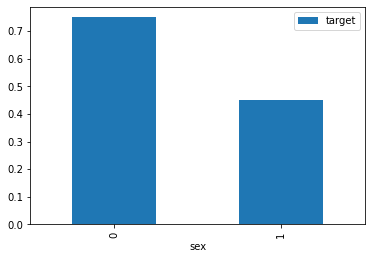

In [8]:
data.groupby(['sex'])[target_variable].mean().plot(kind='bar')

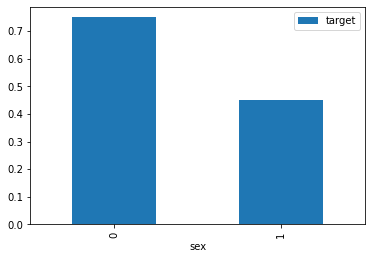

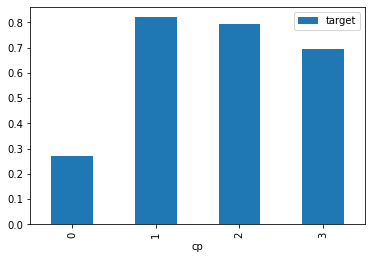

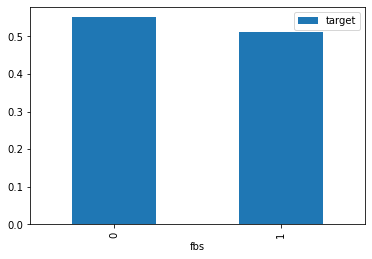

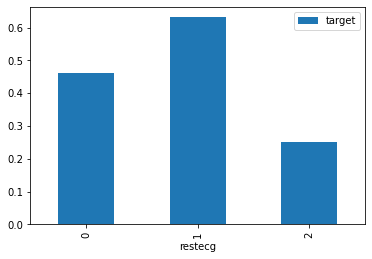

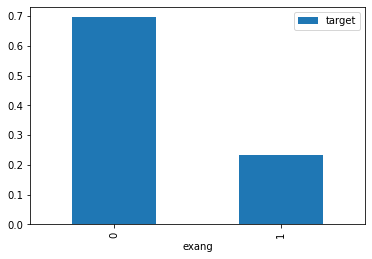

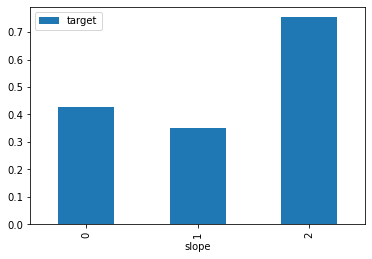

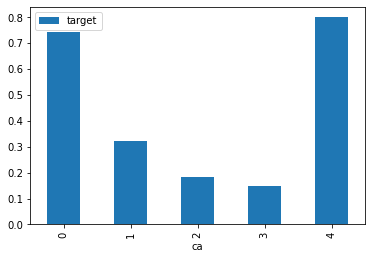

In [9]:
# apply above query in the for loop

for each_col in cat_cols:
    data.groupby([each_col])[target_variable].mean().plot(kind='bar')

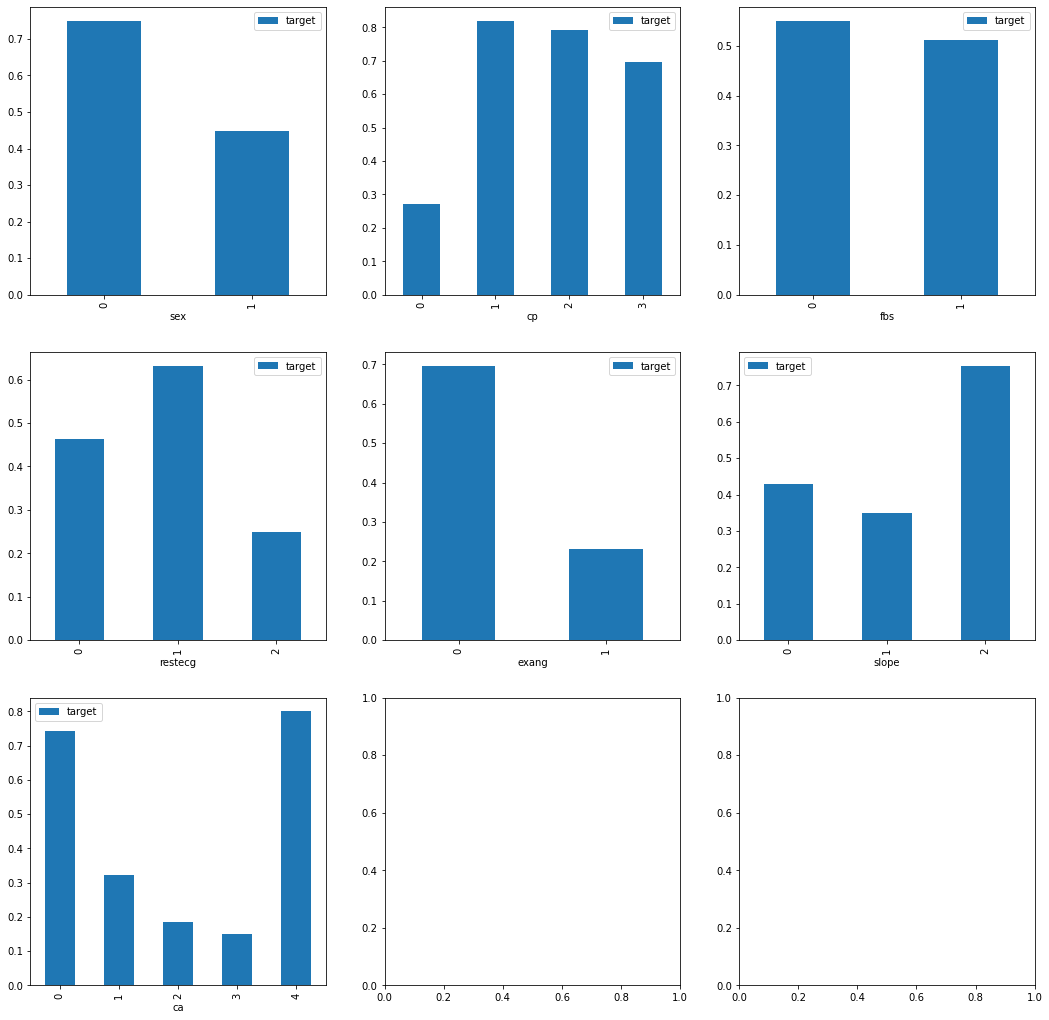

In [10]:
# using subplot for a better view

fig,axes = plt.subplots(3,3)
for index, each_col in enumerate(cat_cols):
    data.groupby([each_col])[target_variable].mean().plot(kind='bar',figsize=(18,18),ax=axes[int(index/3),index%3])

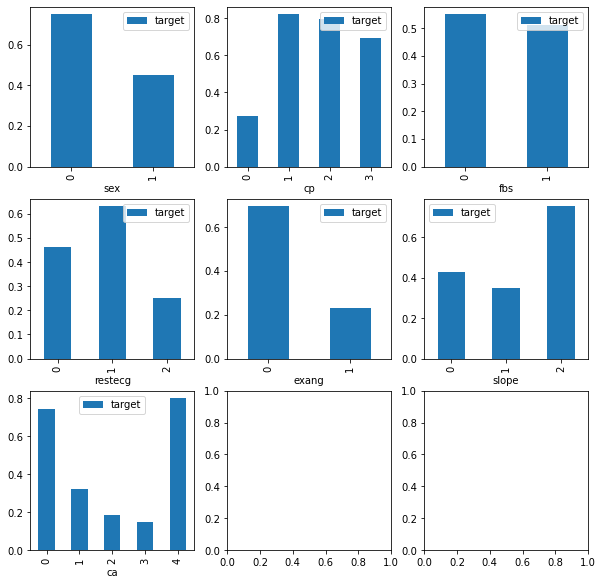

In [11]:
# flooring instead of integer
fig,axes = plt.subplots(3,3)
for index, each_col in enumerate(cat_cols):
    data.groupby([each_col])[target_variable].mean().plot(kind='bar',figsize=(10,10),ax=axes[index//3,index%3])

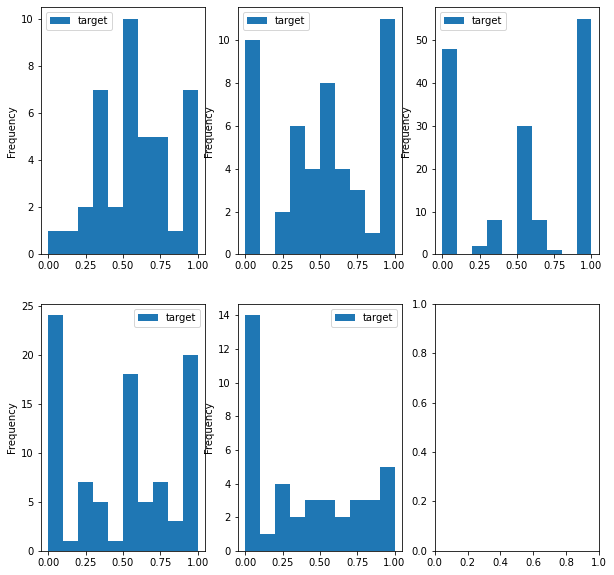

In [12]:
num_cols = ['age','trestbps','chol','thalach','oldpeak']

fig,axes = plt.subplots(2,3)
for index, each_col in enumerate(num_cols):
    data.groupby([each_col])[target_variable].mean().plot(kind='hist',figsize=(10,10),ax=axes[index//3,index%3])

<AxesSubplot:xlabel='age_bin'>

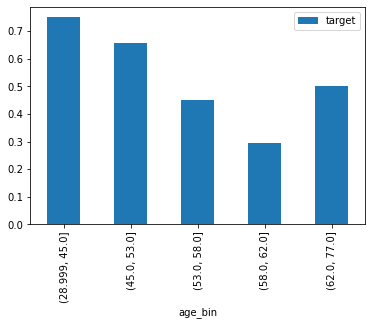

In [13]:
data['age_bin'] = pd.qcut(data['age'],q=5)
data.groupby(['age_bin'])[target_variable].mean().plot(kind='bar')

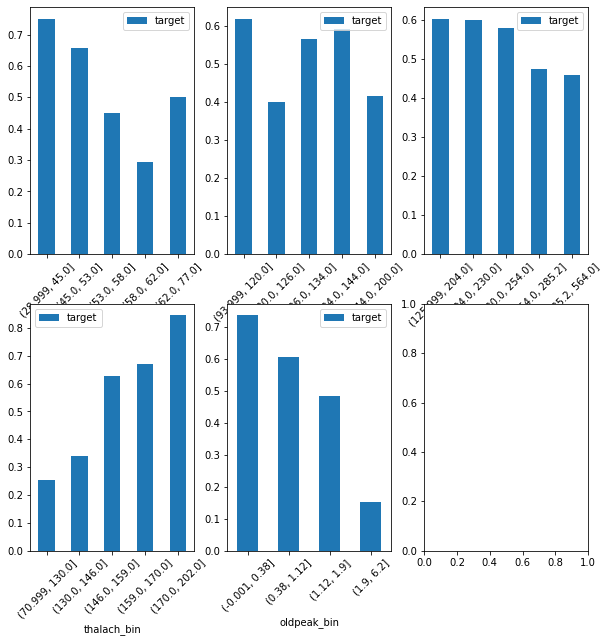

In [14]:
# making dynamic
num_cols = ['age','trestbps','chol','thalach','oldpeak']

fig,axes = plt.subplots(2,3)
for index, each_col in enumerate(num_cols):
#     data.groupby([each_col])[target_variable].mean().plot(kind='hist',figsize=(10,10),ax=axes[index//3,index%3])
    data[each_col+'_bin'] = pd.qcut(data[each_col],q=5,duplicates='drop')
    data.groupby([each_col + '_bin'])[target_variable].mean().plot(kind='bar',figsize=(10,10),ax=axes[index//3,index%3],rot=45)

In [15]:
# train test

X=data[cat_cols+num_cols]
Y=data[target_variable]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [16]:
x_train.head()
x_test.head()

,sex,cp,fbs,restecg,exang,slope,ca,age,trestbps,chol,thalach,oldpeak
43,0,0,0,0,0,1,0,53,130,264,143,0.4
150,1,0,0,0,0,2,0,66,160,228,138,2.3
167,0,0,0,0,0,0,2,62,140,268,160,3.6
182,0,0,0,0,0,2,0,61,130,330,169,0.0
231,1,0,1,0,0,1,3,57,165,289,124,1.0


In [17]:
# decision tree

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
clf.predict(x_train)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,clf.predict(x_train))

1.0

In [20]:
accuracy_score(y_test,clf.predict(x_test))

0.7252747252747253

In [21]:
# precision , recall

In [22]:
from sklearn.metrics import precision_recall_curve

In [23]:
pr,rc,x = precision_recall_curve(y_test,clf.predict(x_test))

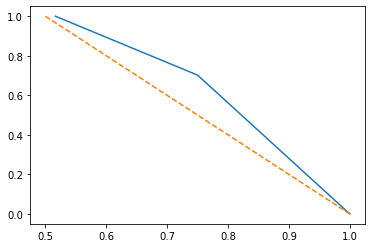

In [24]:
plt.plot(pr,rc)
plt.plot([0.5,1],[1,0],linestyle='--')

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73        44
           1       0.75      0.70      0.73        47

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.73      0.73      0.73        91



In [26]:
# roc-auc

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,clf.predict_proba(x_train)[:,1])

1.0

In [27]:
roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

0.726063829787234

In [28]:
from sklearn.metrics import roc_curve
fpr,tpr,thr = roc_curve(y_test,clf.predict_proba(x_test)[:,1])

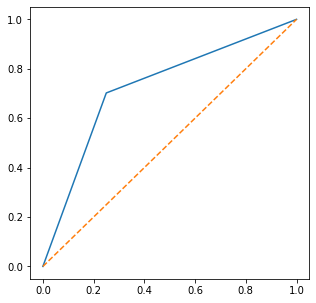

In [29]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')

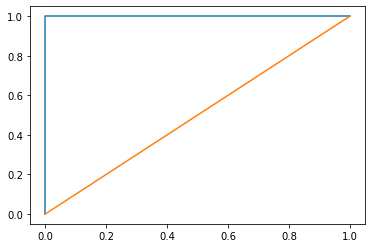

In [30]:
fpr,tpr,thr = roc_curve(y_train,clf.predict_proba(x_train)[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])

# hyper parameter

## DecisionTreeClassifier

In [50]:
# CV is K fold cross validation
from sklearn.model_selection import GridSearchCV

clf=DecisionTreeClassifier()

params={
    'max_depth': [3,5,7],
    'min_samples_leaf':[3,5,10]
}

In [51]:
grid = GridSearchCV(estimator=clf,
                   param_grid=params,
                   scoring='roc_auc',
                   cv=3)

In [52]:
x = data[num_cols+cat_cols]
y = data[target_variable]

In [53]:
grid.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [3, 5, 10]},
             scoring='roc_auc')

In [54]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10)

In [64]:
grid.best_estimator_.predict_proba(x)

array([[0.15384615, 0.84615385],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.30769231, 0.69230769],
       [0.36363636, 0.63636364],
       [0.18181818, 0.81818182],
       [0.1       , 0.9       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.15384615, 0.84615385],
       [0.5       , 0.5       ],
       [0.35714286, 0.64285714],
       [0.        , 1.        ],
       [0.15384615, 0.84615385],
       [0.3       , 0.7       ],
       [0.        , 1.        ],
       [0.3       , 0.7       ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.30769231, 0.69230769],
       [0.18181818, 0.81818182],
       [0.15384615, 0.84615385],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.15384615, 0.84615385],
       [0.35714286, 0.64285714],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [72]:
grid.best_estimator_.predict_proba(x_test)

array([[0.36363636, 0.63636364],
       [0.78947368, 0.21052632],
       [0.35714286, 0.64285714],
       [0.36363636, 0.63636364],
       [0.35714286, 0.64285714],
       [0.35714286, 0.64285714],
       [0.36363636, 0.63636364],
       [0.78947368, 0.21052632],
       [0.36363636, 0.63636364],
       [0.36363636, 0.63636364],
       [0.35714286, 0.64285714],
       [0.35714286, 0.64285714],
       [0.36363636, 0.63636364],
       [1.        , 0.        ],
       [0.35714286, 0.64285714],
       [0.78947368, 0.21052632],
       [0.8       , 0.2       ],
       [0.35714286, 0.64285714],
       [0.35714286, 0.64285714],
       [0.78947368, 0.21052632],
       [0.78947368, 0.21052632],
       [0.35714286, 0.64285714],
       [0.78947368, 0.21052632],
       [0.35714286, 0.64285714],
       [0.36363636, 0.63636364],
       [0.35714286, 0.64285714],
       [0.36363636, 0.63636364],
       [0.35714286, 0.64285714],
       [0.35714286, 0.64285714],
       [1.        , 0.        ],
       [0.

In [55]:
grid.best_score_

0.8545454545454545

In [56]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 10}

In [58]:
grid.cv_results_

{'mean_fit_time': array([0.0356942 , 0.00299176, 0.00273887, 0.00199509, 0.00240159,
        0.00231409, 0.00415238, 0.00232736, 0.00232712]),
 'std_fit_time': array([3.99477432e-02, 5.94720425e-07, 3.58023442e-04, 8.92080638e-07,
        5.04753135e-04, 4.85471085e-04, 2.24702811e-03, 4.70246478e-04,
        4.69911239e-04]),
 'mean_score_time': array([0.03370579, 0.00370097, 0.00191514, 0.00203514, 0.00199302,
        0.00199525, 0.00196282, 0.00169841, 0.00201885]),
 'std_score_time': array([3.85266950e-02, 5.05632053e-04, 1.12223051e-04, 5.83364354e-05,
        3.49499916e-06, 1.07214749e-06, 4.88559688e-05, 4.18883478e-04,
        3.56286678e-05]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[3, 5, 10, 3, 5, 10, 3, 5, 10],
              mask=[False, False, Fals

In [59]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035694,3.994774e-02,0.033706,0.038527,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.794664,0.840316,0.815020,0.816667,0.018674,7
1,0.002992,5.947204e-07,0.003701,0.000506,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.817589,0.842688,0.815020,0.825099,0.012481,5
2,0.002739,3.580234e-04,0.001915,0.000112,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.854941,0.837945,0.830435,0.841107,0.010251,3
3,0.001995,8.920806e-07,0.002035,0.000058,5,3,"{'max_depth': 5, 'min_samples_leaf': 3}",0.808103,0.869960,0.797826,0.825296,0.031860,4
4,0.002402,5.047531e-04,0.001993,0.000003,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",0.778854,0.887945,0.790316,0.819038,0.048948,6
5,0.002314,4.854711e-04,0.001995,0.000001,5,10,"{'max_depth': 5, 'min_samples_leaf': 10}",0.861067,0.874901,0.824901,0.853623,0.021080,2
6,0.004152,2.247028e-03,0.001963,0.000049,7,3,"{'max_depth': 7, 'min_samples_leaf': 3}",0.786957,0.851581,0.775889,0.804809,0.033380,9
7,0.002327,4.702465e-04,0.001698,0.000419,7,5,"{'max_depth': 7, 'min_samples_leaf': 5}",0.781818,0.869960,0.785573,0.812451,0.040695,8
8,0.002327,4.699112e-04,0.002019,0.000036,7,10,"{'max_depth': 7, 'min_samples_leaf': 10}",0.861067,0.882213,0.820356,0.854545,0.025671,1


In [63]:
# Usually we only consider the test data for evaluation and not the train data. In case you want to use the train data then in that case u can set train score value as true and then it will consider train metrics also for evaluation.
grid.return_train_score=True

In [62]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035694,3.994774e-02,0.033706,0.038527,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.794664,0.840316,0.815020,0.816667,0.018674,7
1,0.002992,5.947204e-07,0.003701,0.000506,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.817589,0.842688,0.815020,0.825099,0.012481,5
2,0.002739,3.580234e-04,0.001915,0.000112,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",0.854941,0.837945,0.830435,0.841107,0.010251,3
3,0.001995,8.920806e-07,0.002035,0.000058,5,3,"{'max_depth': 5, 'min_samples_leaf': 3}",0.808103,0.869960,0.797826,0.825296,0.031860,4
4,0.002402,5.047531e-04,0.001993,0.000003,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",0.778854,0.887945,0.790316,0.819038,0.048948,6
5,0.002314,4.854711e-04,0.001995,0.000001,5,10,"{'max_depth': 5, 'min_samples_leaf': 10}",0.861067,0.874901,0.824901,0.853623,0.021080,2
6,0.004152,2.247028e-03,0.001963,0.000049,7,3,"{'max_depth': 7, 'min_samples_leaf': 3}",0.786957,0.851581,0.775889,0.804809,0.033380,9
7,0.002327,4.702465e-04,0.001698,0.000419,7,5,"{'max_depth': 7, 'min_samples_leaf': 5}",0.781818,0.869960,0.785573,0.812451,0.040695,8
8,0.002327,4.699112e-04,0.002019,0.000036,7,10,"{'max_depth': 7, 'min_samples_leaf': 10}",0.861067,0.882213,0.820356,0.854545,0.025671,1


## DecisionTreeRegressor

In [77]:
import seaborn as sns
adv_data=pd.read_csv('advertising.csv')
adv_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [79]:
x=adv_data[['TV','Radio','Newspaper']]
y=adv_data['Sales']

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=123)

In [87]:
x_train.head()

,TV,Radio,Newspaper
81,239.8,4.1,36.9
107,90.4,0.3,23.2
112,175.7,15.4,2.4
145,140.3,1.9,9.0
8,8.6,2.1,1.0


In [88]:
y_test.sample(5)

79     11.0
139    20.7
152    16.6
172     7.6
19     14.6
Name: Sales, dtype: float64

In [89]:
y_test.shape
x_train.shape

(140, 3)

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params={
    'max_depth': [3,5,7],
    'min_samples_leaf' : [5,10]
}

dtr = DecisionTreeRegressor(random_state=120)

grid=GridSearchCV(estimator=dtr,
                 param_grid=params,
                scoring='roc_auc',
                 cv = 3)

In [91]:
grid.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=120),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [5, 10]},
             scoring='roc_auc')

In [92]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=120)

In [93]:
grid.best_estimator_.predict(x)

array([21.94871795, 13.1       ,  7.50526316, 17.95882353, 15.24375   ,
        7.50526316, 13.1       , 10.26410256,  4.67142857, 11.86206897,
       10.26410256, 15.24375   ,  7.50526316, 10.26410256, 21.94871795,
       21.94871795, 13.1       , 21.94871795, 10.26410256, 15.24375   ,
       21.94871795, 11.86206897,  7.50526316, 15.24375   , 10.26410256,
       11.86206897, 17.95882353, 15.24375   , 21.94871795, 10.26410256,
       21.94871795, 10.26410256, 10.26410256, 15.24375   , 10.26410256,
       11.86206897, 21.94871795, 13.1       , 10.26410256, 21.94871795,
       15.24375   , 17.95882353, 21.94871795, 11.86206897,  7.50526316,
       15.24375   , 10.26410256, 21.94871795, 15.24375   , 10.26410256,
       11.86206897, 10.26410256, 21.94871795, 17.95882353, 21.94871795,
       21.94871795,  4.67142857, 15.24375   , 21.94871795, 21.94871795,
       10.26410256, 21.94871795, 15.24375   , 13.1       , 17.95882353,
       10.26410256, 10.26410256, 15.24375   , 21.94871795, 21.94

In [95]:
grid.best_index_

0

In [96]:
grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 5}

In [97]:
grid.cv_results_

{'mean_fit_time': array([0.10171302, 0.0059646 , 0.00150514, 0.00528256, 0.        ,
        0.00535019]),
 'std_fit_time': array([0.13457044, 0.00843521, 0.00212858, 0.00747067, 0.        ,
        0.00756631]),
 'mean_score_time': array([0.01176532, 0.        , 0.        , 0.00033379, 0.00522916,
        0.00033283]),
 'std_score_time': array([0.01663868, 0.        , 0.        , 0.00047204, 0.00739514,
        0.0004707 ]),
 'param_max_depth': masked_array(data=[3, 3, 5, 5, 7, 7],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[5, 10, 5, 10, 5, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'min_samples_leaf': 5},
  {'max_depth': 3, 'min_samples_leaf': 10},
  {'max_depth': 5, 'min_samples_leaf': 5},
  {'max_depth': 5, 'min_samples_leaf': 10},
  {'max_depth': 7, 'min_sample

In [98]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101713,0.134570,0.011765,0.016639,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",NaN,NaN,NaN,NaN,NaN,1
1,0.005965,0.008435,0.000000,0.000000,3,10,"{'max_depth': 3, 'min_samples_leaf': 10}",NaN,NaN,NaN,NaN,NaN,2
2,0.001505,0.002129,0.000000,0.000000,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",NaN,NaN,NaN,NaN,NaN,3
3,0.005283,0.007471,0.000334,0.000472,5,10,"{'max_depth': 5, 'min_samples_leaf': 10}",NaN,NaN,NaN,NaN,NaN,4
4,0.000000,0.000000,0.005229,0.007395,7,5,"{'max_depth': 7, 'min_samples_leaf': 5}",NaN,NaN,NaN,NaN,NaN,5
5,0.005350,0.007566,0.000333,0.000471,7,10,"{'max_depth': 7, 'min_samples_leaf': 10}",NaN,NaN,NaN,NaN,NaN,6


In [ ]:
# find gini impurity

# RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()

params = {
    'n_estimators' : [50,100,200,500],
    'max_depth' : [3,5,7],
    'max_samples' : [0.8,0.9,1],    # number of rows(data) that should be there . eg 80% 
    'max_features' : [5,8,10],   # number of columns that can be there
    'min_samples_leaf' : [10,20],  # min no. of samples that should  be there in a leaf node. # if we take very less value then we might overfit the data nd very high value then it will not go very deep into tree so underfit might happen.
    'min_samples_split' : [10,20]  # to consider splitting further or not this much no. of minimum samples should be there.
}

# nnumber of models it will create is - 4*3*3*3*3*2 = ..

In [34]:
grid = GridSearchCV(estimator=rf_clf,
                   param_grid=params,
                   cv=3,
                   scoring='roc_auc')

In [35]:
x = data[num_cols+cat_cols]
y = data[target_variable]

In [73]:
grid.fit(x,y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [3, 5, 10]},
             return_train_score=True, scoring='roc_auc')

In [53]:
# rremove som params and try again